In [3]:
import numpy as np 
import pandas as pd 

In [4]:
def grading(g):
    if g <= 9 :
        return 0
    elif g <= 11:
        return 1
    elif g <=14:
        return 2 
    elif g <= 17:
        return 3
    else:
        return 4

In [5]:
df = pd.read_csv("student-por.csv", sep = ";")
df['G3_graded'] = df['G3'].apply(grading)
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [6]:
# df.select_dtypes(include="object").columns

In [7]:
# df.select_dtypes(include = "int64").columns

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [9]:
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

In [10]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [11]:
preprocessor = ColumnTransformer(
    transformers = [
        ('numerical', StandardScaler(), numerical_features),
        ('categorical', OneHotEncoder(drop = "first" , handle_unknown = "ignore"), categorical_features)
    ] , 
    remainder = 'passthrough'
)

In [12]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state = 42)),
    ('classifier', RandomForestClassifier(class_weight = 'balanced',random_state = 42))
])

In [13]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8076923076923077


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.80      0.83      0.81        42
           2       0.90      0.85      0.88        41
           3       0.74      0.96      0.84        24
           4       1.00      0.25      0.40         8

    accuracy                           0.81       130
   macro avg       0.83      0.71      0.72       130
weighted avg       0.82      0.81      0.80       130



In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
print(cm)

[[10  5  0  0  0]
 [ 4 35  3  0  0]
 [ 0  4 35  2  0]
 [ 0  0  1 23  0]
 [ 0  0  0  6  2]]


Text(0.5, 1.0, 'Confusion Matrix')

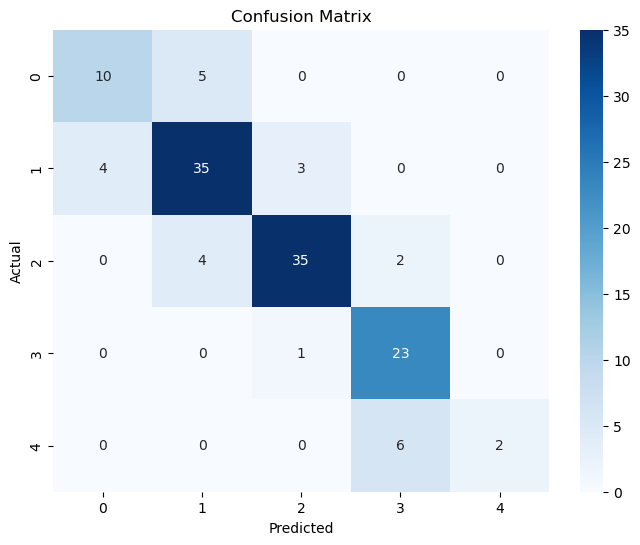

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')